In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/home/praveen/projects/machinehack/train.csv')
test = pd.read_csv('/home/praveen/projects/machinehack/test.csv')
sample = pd.read_csv('/home/praveen/projects/machinehack/submission.csv')

In [3]:
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [5]:
train.shape  ,  test.shape

((17996, 17), (7713, 16))

In [6]:
train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [7]:
train.drop(['key','instrumentalness'],axis=1,inplace=True)

In [8]:
train["Popularity"].fillna('0',inplace = True)


In [9]:
train.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

<AxesSubplot:title={'center':'top 20 Artist'}>

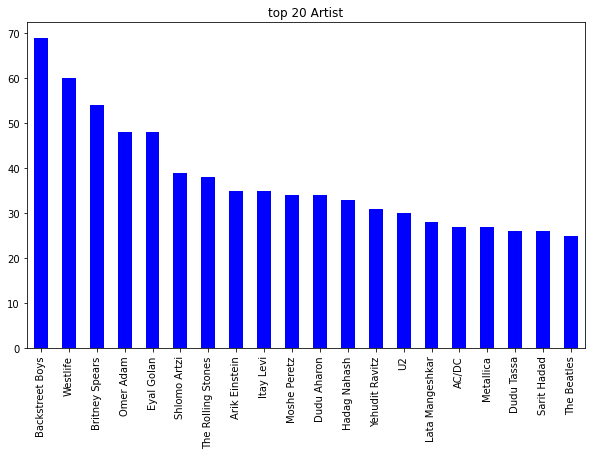

In [10]:
Artist=train['Artist Name'].value_counts()
Artist.head(20).plot(kind='bar',figsize=(10,6),title='top 20 Artist',color='blue')

<AxesSubplot:>

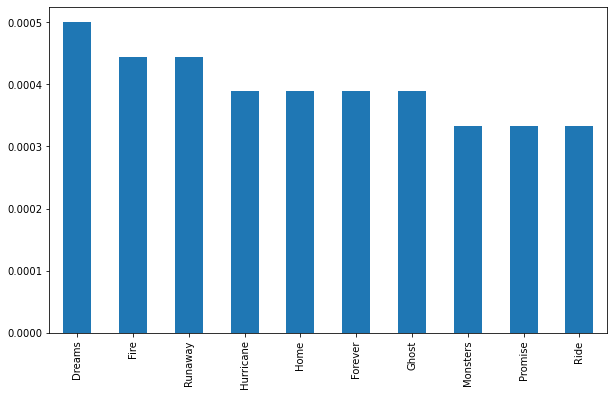

In [11]:
track = train['Track Name'].value_counts(normalize=True)
track.head(10).plot(kind = 'bar',figsize = (10,6))

<AxesSubplot:xlabel='Artist Name,Popularity'>

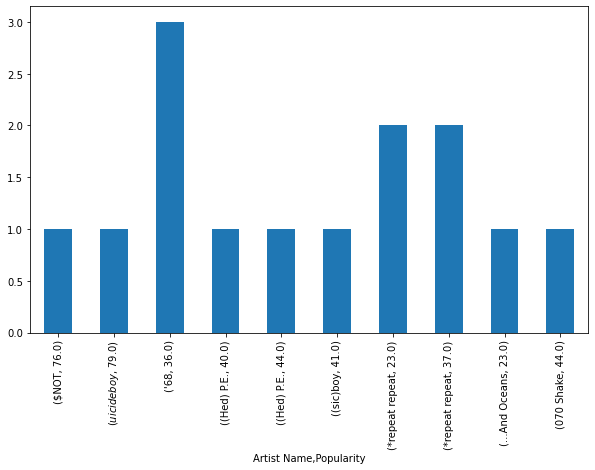

In [12]:
popularity = train.groupby('Artist Name')['Popularity'].value_counts()
popularity.head(10).plot(kind = 'bar',figsize = (10,6))

<AxesSubplot:>

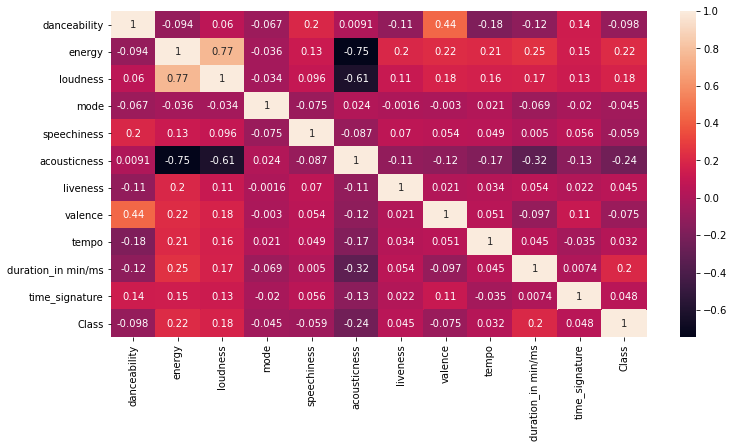

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(),annot = True)

<AxesSubplot:xlabel='Artist Name,energy'>

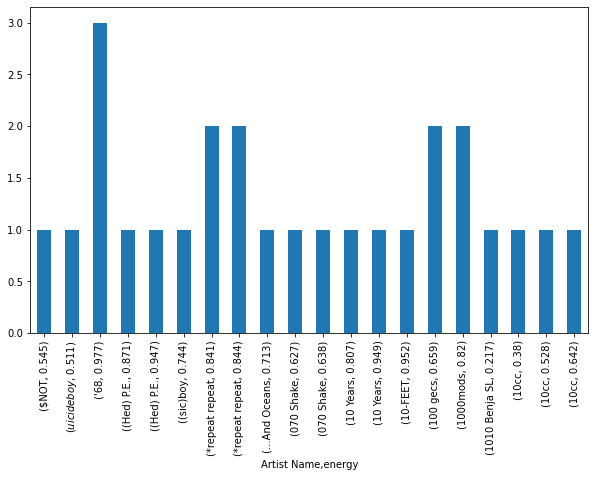

In [14]:
energy = train.groupby('Artist Name')['energy'].value_counts(ascending=False)
energy.head(20).plot(kind = 'bar',figsize = (10,6))


In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Popularity               23.000000
danceability              0.227000
energy                    0.351000
key                       6.000000
loudness                  4.349000
mode                      1.000000
speechiness               0.048200
acousticness              0.429700
instrumentalness          0.199911
liveness                  0.160500
valence                   0.375000
tempo                    42.348500
duration_in min/ms    86153.000000
time_signature            0.000000
Class                     5.000000
dtype: float64


<AxesSubplot:>

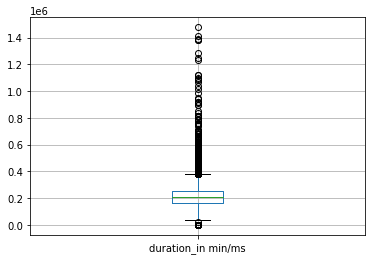

In [18]:
train.boxplot(column=['duration_in min/ms'])

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [21]:
lowprice,uppprice = remove_outlier(train['duration_in min/ms'])
train['duration_in min/ms']=np.where(train['duration_in min/ms']>uppprice,uppprice,train['duration_in min/ms'])
train['duration_in min/ms']=np.where(train['duration_in min/ms']<lowprice,lowprice,train['duration_in min/ms'])

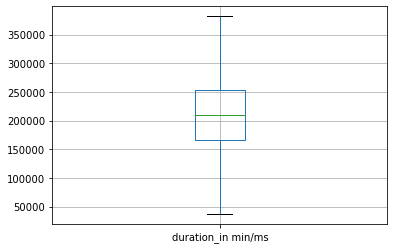

In [22]:
train.boxplot(column=['duration_in min/ms'])
plt.show()

In [23]:
train.drop(['Artist Name','Track Name'],axis=1,inplace = True)

In [24]:
train.head()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10


In [25]:
test.drop(['Artist Name','Track Name','key','instrumentalness','Popularity'],axis=1,inplace = True)

In [26]:
test.head()

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.310,0.403,-13.664,1,0.0326,0.07260,0.1390,0.466,134.480,318027.000000,4
1,0.511,0.955,-5.059,1,0.1290,0.00040,0.2630,0.291,151.937,220413.000000,4
2,0.700,0.709,-5.006,1,0.0839,0.00480,0.0289,0.625,122.019,202960.000000,4
3,0.333,0.637,-4.904,0,0.0581,0.13100,0.1490,0.132,139.898,172693.000000,4
4,0.393,0.849,-4.114,1,0.0459,0.00421,0.1620,0.222,74.028,4.093117,4


In [27]:
test.isnull().sum()

danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [28]:
train = pd.get_dummies(train, drop_first=True)

In [29]:
test = pd.get_dummies(test, drop_first=True)

In [30]:

np.isnan(train.any()) #and gets False
np.isfinite(train.all()) #and gets True

danceability        True
energy              True
loudness            True
mode                True
speechiness         True
                    ... 
Popularity_97.0     True
Popularity_98.0     True
Popularity_99.0     True
Popularity_100.0    True
Popularity_0        True
Length: 112, dtype: bool

In [31]:
X = train.drop('Class',axis = 1)
y = train['Class']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
X_train.shape , X_test.shape

((12597, 111), (5399, 111))

In [34]:
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression()
linreg.fit(X,y)
pred = linreg.predict(X)
print(pred)

[6.28883776 7.64161145 5.5814258  ... 7.83429945 7.38766488 7.7226383 ]


In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.017680906994786

In [40]:
# Create a list of model and name representation for running experiments

model_ls = [(lr, 'Linear Regression'),(ls, 'Lasso'),(rd, 'Ridge'),(dr, 'Decission Tree Reg'), (rr, 'Random Forest Reg')]

# Iterate over each model

for item in model_ls:
    model = item[0]
    name = item[1]
    print(f'Running {name}')
    print('')


# Train the model

    model.fit(X_train, y_train)

# predict the results

    y_pred = model.predict(X_test)

# calculate the root mean squared error

    error = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

# print the value

    print (f'Root mean squared error using {name}is {error}')
    print ('-'*100)
    print('')

Running Linear Regression

Root mean squared error using Linear Regressionis 3.02
----------------------------------------------------------------------------------------------------

Running Lasso

Root mean squared error using Lassois 3.11
----------------------------------------------------------------------------------------------------

Running Ridge

Root mean squared error using Ridgeis 3.02
----------------------------------------------------------------------------------------------------

Running Decission Tree Reg

Root mean squared error using Decission Tree Regis 4.05
----------------------------------------------------------------------------------------------------

Running Random Forest Reg

Root mean squared error using Random Forest Regis 3.05
----------------------------------------------------------------------------------------------------



In [41]:
X = train.iloc[:,0:11]  #independent columns
y = train.iloc[:,0:-101] 
X_test = test

In [42]:
X.shape , X_test.shape

((17996, 11), (7713, 11))

In [43]:
# Instantiate all the models

lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [44]:
lr.fit(X,y)

LinearRegression()

In [45]:
y_pred = lr.predict(test)

In [46]:
print(y_pred)

[[ 3.10000e-01  4.03000e-01 -1.36640e+01 ...  1.34480e+02  3.18027e+05
   4.00000e+00]
 [ 5.11000e-01  9.55000e-01 -5.05900e+00 ...  1.51937e+02  2.20413e+05
   4.00000e+00]
 [ 7.00000e-01  7.09000e-01 -5.00600e+00 ...  1.22019e+02  2.02960e+05
   4.00000e+00]
 ...
 [ 8.05000e-01  9.05000e-01 -7.22200e+00 ...  1.35224e+02  2.45355e+00
   4.00000e+00]
 [ 8.01000e-01  9.30000e-01 -7.36500e+00 ...  1.33255e+02  2.21320e+05
   4.00000e+00]
 [ 6.30000e-01  8.67000e-01 -4.39300e+00 ...  1.56017e+02  1.99922e+05
   4.00000e+00]]


In [47]:
y_pred.shape

(7713, 11)

In [48]:
y_pred = pd.DataFrame(y_pred,columns=['Acoustic/Folk_0','Alt_Music_1','Blues_2','Bollywood_3','Country_4','HipHop_5','Indie Alt_6','Instrumental_7','Metal_8','Pop_9','Rock_10'])

In [49]:
y_pred.head()

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,0.310,0.403,-13.664,1.000000e+00,0.0326,0.07260,0.1390,0.466,134.480,318027.000000,4.0
1,0.511,0.955,-5.059,1.000000e+00,0.1290,0.00040,0.2630,0.291,151.937,220413.000000,4.0
2,0.700,0.709,-5.006,1.000000e+00,0.0839,0.00480,0.0289,0.625,122.019,202960.000000,4.0
3,0.333,0.637,-4.904,7.894251e-16,0.0581,0.13100,0.1490,0.132,139.898,172693.000000,4.0
4,0.393,0.849,-4.114,1.000000e+00,0.0459,0.00421,0.1620,0.222,74.028,4.093117,4.0


In [50]:
y_pred.to_csv('/home/praveen/projects/machinehack/submission2.csv', index=False)